<a href="https://colab.research.google.com/github/sahilfaizal01/Pytorch-Learning/blob/main/TuberClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('/content/drive/My Drive/TuberClassifier/TuberClassifier.csv')
df.head()

,Solidity,Circularity,ConvDefect,Convexity,HullArea,Area,Perimeter,Moment_1,Moment_2,Moment_3,Moment_4,Moment_5,Moment_6,Moment_7,Class


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
bdf = pd.read_csv('/content/drive/My Drive/TuberClassifier/BTuberClassifier.csv')
bdf.head()

,Solidity,Circularity,ConvDefect,Convexity,HullArea,Area,Perimeter,Moment_1,Moment_2,Moment_3,Moment_4,Moment_5,Moment_6,Moment_7,Class


In [ ]:
path = "/content/drive/My Drive/Masks/testing/bad/*"
bad_circ = []
bad_circ_2 = []
bad_conv = []
ar = []
hull_a = []
pr = []
bad_conv_2 = []
solidity = []
defect1 = []
defect_2 = []
solidity_2 = []
from PIL import Image
import math
import cv2, numpy as np
import cv2 as cv
import glob
i = 0
cnt = 0
images = glob.glob(path)
for img in images:
  im = cv2.imread(img, 0)
  i+=1
  ret, thresh = cv2.threshold(im,90,255,cv2.THRESH_BINARY)
  m = cv2.HuMoments(cv2.moments(thresh)).flatten()
  moments = {"mu_1": m[0], "mu_2": m[1], "mu_3": m[2], "mu_4": m[3], "mu_5": m[4], "mu_6": m[5], "mu_7": m[6]}
  im_bw = cv2.Canny(thresh, 10, 90)
  contours, _ = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  for contour in contours:
    perimeter = cv2.arcLength(contour,True)
    area = cv2.contourArea(contour)
    ar.append(area)
    pr.append(perimeter)
    circularity = (4 * math.pi * area)/(perimeter ** 2)
    bad_circ.append(circularity)
    hullv=cv2.convexHull(contour)
    hullv_2 = cv2.convexHull(contour, returnPoints= False)
    per_conv = cv2.arcLength(hullv,True)
    convex = per_conv/perimeter
    bad_conv.append(convex)
    hull = cv.convexHull(contour)
    hull_area = cv.contourArea(hull)
    hull_a.append(hull_area)
    solid = float(area)/hull_area
    solidity.append(solid)
    defect = np.max(cv2.convexityDefects(contour, hullv_2))
    if defect is None:
      continue
    defect1.append(defect)
  d = np.mean(defect1)
  s = np.mean(solidity)
  c = np.median(bad_circ)
  conv = np.mean(bad_conv)
  a = np.mean(ar)
  p = np.mean(pr)
  h = np.mean(hull_a)
  new_row = {"Solidity": s, "Circularity": c, "ConvDefect": d, "Convexity": conv, "HullArea": h, "Area": a, "Perimeter": p, "Moment_1": moments["mu_1"], "Moment_2": moments["mu_2"], "Moment_3": moments["mu_3"], "Moment_4": moments["mu_4"], "Moment_5": moments["mu_5"], "Moment_6": moments["mu_6"],"Moment_7": moments["mu_7"],"Class": 0}
  bdf = bdf.append(new_row, ignore_index=True)
  cnt+=1

print(cnt)
print(i)

158
158


In [ ]:
df.head(10)

,Solidity,Circularity,ConvDefect,Convexity,HullArea,Area,Perimeter,Moment_1,Moment_2,Moment_3,Moment_4,Moment_5,Moment_6,Moment_7,Class
0,0.991665,0.798231,534.000000,0.953136,45290.500000,44913.000000,840.867093,0.000718,1.210575e-07,6.354968e-12,3.312149e-13,1.634286e-25,1.539178e-17,4.518862e-25,1.0
1,0.989558,0.789073,924.000000,0.952395,52955.125000,52386.000000,911.284877,0.000741,1.566876e-07,1.898763e-12,2.476104e-13,1.696786e-25,9.793706e-17,-5.889011e-27,1.0
2,0.990063,0.780513,833.000000,0.953553,51482.333333,50958.500000,910.481330,0.000821,2.827721e-07,1.108718e-12,6.868037e-14,-1.880451e-26,-3.635964e-17,2.361314e-27,1.0
3,0.990808,0.789073,744.750000,0.953883,54510.500000,54007.000000,929.412294,0.000707,1.093339e-07,5.156346e-13,5.247896e-14,8.631428e-27,1.732892e-17,1.506715e-28,1.0
4,0.990301,0.798231,742.800000,0.955232,49923.600000,49446.750000,882.747619,0.000711,1.115716e-07,3.337719e-12,1.261595e-13,-6.060298e-26,-3.663241e-17,5.503955e-26,1.0
5,0.990811,0.804340,709.000000,0.955193,48959.000000,48512.791667,872.205434,0.000699,9.681308e-08,3.046703e-12,2.506800e-13,2.136582e-25,7.310058e-17,-4.841927e-26,1.0
6,0.991214,0.809310,656.714286,0.955487,46445.500000,46034.500000,842.586903,0.000635,1.057863e-08,3.217507e-12,2.875102e-14,6.157945e-27,1.784328e-18,6.208674e-27,1.0
7,0.991507,0.812243,624.312500,0.955973,44145.125000,43762.906250,816.526810,0.000655,3.615164e-08,2.979884e-12,6.060122e-14,5.837941e-27,-1.876783e-19,2.508220e-26,1.0
8,0.965145,0.814889,699.105263,0.952041,42828.105263,42431.684211,780.481098,0.000647,2.398838e-08,4.061279e-12,3.615015e-14,-9.962028e-27,-4.866296e-18,-9.624023e-27,1.0
9,0.966924,0.817022,860.904762,0.952270,43587.642857,43150.738095,788.636546,0.000665,4.755922e-08,2.278107e-12,2.509205e-14,-2.440629e-27,-2.185247e-18,5.480274e-27,1.0


In [ ]:
df

,Solidity,Circularity,ConvDefect,Convexity,HullArea,Area,Perimeter,Moment_1,Moment_2,Moment_3,Moment_4,Moment_5,Moment_6,Moment_7,Class
0,0.991665,0.798231,534.000000,0.953136,45290.500000,44913.000000,840.867093,0.000718,1.210575e-07,6.354968e-12,3.312149e-13,1.634286e-25,1.539178e-17,4.518862e-25,1.0
1,0.989558,0.789073,924.000000,0.952395,52955.125000,52386.000000,911.284877,0.000741,1.566876e-07,1.898763e-12,2.476104e-13,1.696786e-25,9.793706e-17,-5.889011e-27,1.0
2,0.990063,0.780513,833.000000,0.953553,51482.333333,50958.500000,910.481330,0.000821,2.827721e-07,1.108718e-12,6.868037e-14,-1.880451e-26,-3.635964e-17,2.361314e-27,1.0
3,0.990808,0.789073,744.750000,0.953883,54510.500000,54007.000000,929.412294,0.000707,1.093339e-07,5.156346e-13,5.247896e-14,8.631428e-27,1.732892e-17,1.506715e-28,1.0
4,0.990301,0.798231,742.800000,0.955232,49923.600000,49446.750000,882.747619,0.000711,1.115716e-07,3.337719e-12,1.261595e-13,-6.060298e-26,-3.663241e-17,5.503955e-26,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0.974733,0.817057,979.117438,0.953642,38807.968750,38343.302083,744.153832,0.000633,6.445485e-09,4.441131e-12,1.744644e-14,3.488190e-27,1.200642e-18,3.378810e-27,1.0
138,0.971376,0.817022,1113.726950,0.952030,38726.884083,38210.871972,744.747894,0.000632,6.320202e-09,2.133855e-12,8.295434e-15,-7.851859e-28,-6.306137e-19,-7.756166e-28,1.0
139,0.971516,0.817091,1108.933099,0.952057,38615.077320,38101.331615,743.524832,0.000645,2.424014e-08,5.504747e-13,9.896555e-15,3.887365e-28,1.091998e-18,-6.184268e-28,1.0
140,0.971649,0.818015,1106.108392,0.952038,38541.030717,38029.100683,742.833383,0.000670,5.589172e-08,2.695485e-12,9.634351e-14,4.268808e-26,1.856801e-17,2.425309e-26,1.0


In [ ]:
bdf.head(10)

,Solidity,Circularity,ConvDefect,Convexity,HullArea,Area,Perimeter,Moment_1,Moment_2,Moment_3,Moment_4,Moment_5,Moment_6,Moment_7,Class
0,0.947263,0.724230,6679.000000,0.939306,55452.500000,52528.000000,954.690468,0.000784,1.982487e-07,2.441945e-11,3.250829e-12,1.677018e-23,5.505583e-16,2.361518e-23,0.0
1,0.947015,0.689867,5793.000000,0.943830,52950.375000,50145.375000,955.866351,0.000926,4.397782e-07,2.773640e-11,5.010153e-12,4.939148e-23,2.111092e-15,3.238359e-23,0.0
2,0.949298,0.724230,5357.000000,0.946562,48339.666667,45868.083333,900.186055,0.000742,1.362876e-07,1.634549e-11,1.350226e-12,-1.260387e-24,-1.987722e-16,6.216727e-24,0.0
3,0.953850,0.738753,5109.000000,0.948598,48241.250000,45998.062500,889.456819,0.000702,8.197868e-08,2.300752e-11,1.507978e-12,8.882327e-24,4.253142e-16,1.513332e-26,0.0
4,0.957651,0.724230,4613.200000,0.949042,46670.150000,44656.350000,880.895223,0.000839,2.892632e-07,4.655180e-11,1.075388e-11,2.366005e-22,5.513190e-15,4.374976e-23,0.0
5,0.870762,0.723321,10272.727273,0.905310,45711.181818,40602.818182,939.637943,0.000704,7.401909e-08,2.496681e-11,1.557726e-12,9.564096e-24,3.368294e-16,-1.702543e-24,0.0
6,0.857019,0.721644,8611.000000,0.915991,41270.535714,37042.321429,851.697772,0.000758,1.662367e-07,1.551555e-11,1.502392e-12,3.984334e-24,1.442371e-16,-6.061432e-24,0.0
7,0.867751,0.704651,8077.750000,0.919601,42394.968750,38336.343750,870.746480,0.001058,7.032245e-07,1.374163e-11,1.177322e-12,-4.687788e-24,-9.755623e-16,6.702318e-25,0.0
8,0.880216,0.721644,7393.833333,0.923537,40469.277778,36805.722222,840.958018,0.000648,2.171609e-08,4.664351e-12,1.219787e-13,8.473764e-26,1.796983e-17,-3.584470e-26,0.0
9,0.888935,0.724019,6967.050000,0.925669,38932.950000,35553.925000,817.472832,0.000645,1.661294e-08,1.833185e-12,7.199148e-14,-1.121467e-26,-1.882633e-19,2.362670e-26,0.0


In [ ]:
bdf

,Solidity,Circularity,ConvDefect,Convexity,HullArea,Area,Perimeter,Moment_1,Moment_2,Moment_3,Moment_4,Moment_5,Moment_6,Moment_7,Class
0,0.947263,0.724230,6679.000000,0.939306,55452.500000,52528.000000,954.690468,0.000784,1.982487e-07,2.441945e-11,3.250829e-12,1.677018e-23,5.505583e-16,2.361518e-23,0.0
1,0.947015,0.689867,5793.000000,0.943830,52950.375000,50145.375000,955.866351,0.000926,4.397782e-07,2.773640e-11,5.010153e-12,4.939148e-23,2.111092e-15,3.238359e-23,0.0
2,0.949298,0.724230,5357.000000,0.946562,48339.666667,45868.083333,900.186055,0.000742,1.362876e-07,1.634549e-11,1.350226e-12,-1.260387e-24,-1.987722e-16,6.216727e-24,0.0
3,0.953850,0.738753,5109.000000,0.948598,48241.250000,45998.062500,889.456819,0.000702,8.197868e-08,2.300752e-11,1.507978e-12,8.882327e-24,4.253142e-16,1.513332e-26,0.0
4,0.957651,0.724230,4613.200000,0.949042,46670.150000,44656.350000,880.895223,0.000839,2.892632e-07,4.655180e-11,1.075388e-11,2.366005e-22,5.513190e-15,4.374976e-23,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.921632,0.754743,4324.672078,0.938005,31647.147910,29900.225080,705.697703,0.000759,1.746763e-07,1.377125e-11,2.438767e-12,1.380672e-23,9.849906e-16,-3.020461e-24,0.0
154,0.921824,0.754271,4315.783871,0.938091,31630.920128,29886.156550,705.803934,0.000826,2.342070e-07,1.101587e-10,2.276041e-11,1.098207e-21,1.030509e-14,3.046171e-22,0.0
155,0.922088,0.753711,4307.413462,0.938128,31672.861905,29930.306349,706.389606,0.000770,1.874124e-07,1.489346e-11,2.384316e-12,1.415698e-23,1.025719e-15,1.207002e-24,0.0
156,0.922490,0.754271,4293.404459,0.938293,31834.413249,30097.722397,707.738764,0.000664,3.375887e-08,1.883239e-11,8.642080e-13,3.454939e-24,1.573681e-16,4.674948e-25,0.0


In [ ]:
df.to_csv('GoodClass.csv')

In [ ]:
bdf.to_csv('BadClass.csv')

In [ ]:
frames = [df, bdf]  
result = pd.concat(frames)
display(result)

,Solidity,Circularity,ConvDefect,Convexity,HullArea,Area,Perimeter,Moment_1,Moment_2,Moment_3,Moment_4,Moment_5,Moment_6,Moment_7,Class
0,0.991665,0.798231,534.000000,0.953136,45290.500000,44913.000000,840.867093,0.000718,1.210575e-07,6.354968e-12,3.312149e-13,1.634286e-25,1.539178e-17,4.518862e-25,1.0
1,0.989558,0.789073,924.000000,0.952395,52955.125000,52386.000000,911.284877,0.000741,1.566876e-07,1.898763e-12,2.476104e-13,1.696786e-25,9.793706e-17,-5.889011e-27,1.0
2,0.990063,0.780513,833.000000,0.953553,51482.333333,50958.500000,910.481330,0.000821,2.827721e-07,1.108718e-12,6.868037e-14,-1.880451e-26,-3.635964e-17,2.361314e-27,1.0
3,0.990808,0.789073,744.750000,0.953883,54510.500000,54007.000000,929.412294,0.000707,1.093339e-07,5.156346e-13,5.247896e-14,8.631428e-27,1.732892e-17,1.506715e-28,1.0
4,0.990301,0.798231,742.800000,0.955232,49923.600000,49446.750000,882.747619,0.000711,1.115716e-07,3.337719e-12,1.261595e-13,-6.060298e-26,-3.663241e-17,5.503955e-26,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.921632,0.754743,4324.672078,0.938005,31647.147910,29900.225080,705.697703,0.000759,1.746763e-07,1.377125e-11,2.438767e-12,1.380672e-23,9.849906e-16,-3.020461e-24,0.0
154,0.921824,0.754271,4315.783871,0.938091,31630.920128,29886.156550,705.803934,0.000826,2.342070e-07,1.101587e-10,2.276041e-11,1.098207e-21,1.030509e-14,3.046171e-22,0.0
155,0.922088,0.753711,4307.413462,0.938128,31672.861905,29930.306349,706.389606,0.000770,1.874124e-07,1.489346e-11,2.384316e-12,1.415698e-23,1.025719e-15,1.207002e-24,0.0
156,0.922490,0.754271,4293.404459,0.938293,31834.413249,30097.722397,707.738764,0.000664,3.375887e-08,1.883239e-11,8.642080e-13,3.454939e-24,1.573681e-16,4.674948e-25,0.0


In [ ]:
result.to_csv('Combined.csv')

# **Split the Data into Training and Testing Set**

In [81]:
X = result.iloc[:,:-1]
y = result.iloc[:,-1]

In [82]:
X

,Solidity,Circularity,ConvDefect,Convexity,HullArea,Area,Perimeter,Moment_1,Moment_2,Moment_3,Moment_4,Moment_5,Moment_6,Moment_7
0,0.991665,0.798231,534.000000,0.953136,45290.500000,44913.000000,840.867093,0.000718,1.210575e-07,6.354968e-12,3.312149e-13,1.634286e-25,1.539178e-17,4.518862e-25
1,0.989558,0.789073,924.000000,0.952395,52955.125000,52386.000000,911.284877,0.000741,1.566876e-07,1.898763e-12,2.476104e-13,1.696786e-25,9.793706e-17,-5.889011e-27
2,0.990063,0.780513,833.000000,0.953553,51482.333333,50958.500000,910.481330,0.000821,2.827721e-07,1.108718e-12,6.868037e-14,-1.880451e-26,-3.635964e-17,2.361314e-27
3,0.990808,0.789073,744.750000,0.953883,54510.500000,54007.000000,929.412294,0.000707,1.093339e-07,5.156346e-13,5.247896e-14,8.631428e-27,1.732892e-17,1.506715e-28
4,0.990301,0.798231,742.800000,0.955232,49923.600000,49446.750000,882.747619,0.000711,1.115716e-07,3.337719e-12,1.261595e-13,-6.060298e-26,-3.663241e-17,5.503955e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.921632,0.754743,4324.672078,0.938005,31647.147910,29900.225080,705.697703,0.000759,1.746763e-07,1.377125e-11,2.438767e-12,1.380672e-23,9.849906e-16,-3.020461e-24
154,0.921824,0.754271,4315.783871,0.938091,31630.920128,29886.156550,705.803934,0.000826,2.342070e-07,1.101587e-10,2.276041e-11,1.098207e-21,1.030509e-14,3.046171e-22
155,0.922088,0.753711,4307.413462,0.938128,31672.861905,29930.306349,706.389606,0.000770,1.874124e-07,1.489346e-11,2.384316e-12,1.415698e-23,1.025719e-15,1.207002e-24
156,0.922490,0.754271,4293.404459,0.938293,31834.413249,30097.722397,707.738764,0.000664,3.375887e-08,1.883239e-11,8.642080e-13,3.454939e-24,1.573681e-16,4.674948e-25


In [83]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
153    0.0
154    0.0
155    0.0
156    0.0
157    0.0
Name: Class, Length: 300, dtype: float64

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = .75, stratify = y)

# **Scaling the Data - Normalising Data**

In [85]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Linear Discriminant Analysis(LDA) - Data Transformations**

In [88]:
lda = LDA(n_components=1)
Xtrain = lda.fit_transform(X_train, y_train)
Xtest = lda.transform(X_test)

In [89]:
clf = LDA(store_covariance = True)
clf.fit(X_train, y_train) 

LinearDiscriminantAnalysis(store_covariance=True)

In [90]:
coef = clf.coef_[0]
scalings = clf.scalings_

In [91]:
clf.explained_variance_ratio_

array([1.])

In [92]:
coef

array([-6.84364082e+00,  7.23631866e+01, -7.18743565e+02,  2.06241448e+00,
        4.14881102e+03, -4.14197393e+03, -2.59460439e+02,  3.59329890e+01,
       -3.19490707e+01,  8.38272689e+00, -1.60893429e+01, -2.48461948e+00,
        7.21145096e+00, -4.44659723e+00])

In [93]:
scalings

array([[-2.62325983e-01],
       [ 2.77377855e+00],
       [-2.75504103e+01],
       [ 7.90551290e-02],
       [ 1.59029522e+02],
       [-1.58767447e+02],
       [-9.94546858e+00],
       [ 1.37735993e+00],
       [-1.22465097e+00],
       [ 3.21321228e-01],
       [-6.16726214e-01],
       [-9.52388161e-02],
       [ 2.76424642e-01],
       [-1.70444070e-01]])

# **Logistic Regression - on Transformed Data**

In [94]:
lr = LogisticRegression()

lr.fit(Xtrain, y_train)
y_pred = lr.predict(Xtest)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy:- ' + str(accuracy_score(y_test, y_pred)))

[[40  0]
 [ 0 35]]
Accuracy:- 1.0


# **Random Forest Classifier - on Transformed Data**

In [95]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(Xtrain, y_train)
y_pred = classifier.predict(Xtest)

In [96]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy:- ' + str(accuracy_score(y_test, y_pred)))

[[40  0]
 [ 0 35]]
Accuracy:- 1.0


In [98]:
X.head()

,Solidity,Circularity,ConvDefect,Convexity,HullArea,Area,Perimeter,Moment_1,Moment_2,Moment_3,Moment_4,Moment_5,Moment_6,Moment_7
0,0.991665,0.798231,534.00,0.953136,45290.500000,44913.00,840.867093,0.000718,1.210575e-07,6.354968e-12,3.312149e-13,1.634286e-25,1.539178e-17,4.518862e-25
1,0.989558,0.789073,924.00,0.952395,52955.125000,52386.00,911.284877,0.000741,1.566876e-07,1.898763e-12,2.476104e-13,1.696786e-25,9.793706e-17,-5.889011e-27
2,0.990063,0.780513,833.00,0.953553,51482.333333,50958.50,910.481330,0.000821,2.827721e-07,1.108718e-12,6.868037e-14,-1.880451e-26,-3.635964e-17,2.361314e-27
3,0.990808,0.789073,744.75,0.953883,54510.500000,54007.00,929.412294,0.000707,1.093339e-07,5.156346e-13,5.247896e-14,8.631428e-27,1.732892e-17,1.506715e-28
4,0.990301,0.798231,742.80,0.955232,49923.600000,49446.75,882.747619,0.000711,1.115716e-07,3.337719e-12,1.261595e-13,-6.060298e-26,-3.663241e-17,5.503955e-26


# **XGBoost Classifier - for Feature Extraction**

In [99]:
X_train_df = pd.DataFrame(X_train, columns = ['Solidity','Circularity','ConvDefect','Convexity','HullArea','Area','Perimeter','Moment_1','Moment_2','Moment_3','Moment_4','Moment_5','Moment_6','Moment_7'])
X_test_df = pd.DataFrame(X_test, columns =  ['Solidity','Circularity','ConvDefect','Convexity','HullArea','Area','Perimeter','Moment_1','Moment_2','Moment_3','Moment_4','Moment_5','Moment_6','Moment_7'])

In [100]:
X_train_new = X_train_df.drop("Circularity", axis=1)
X_test_new = X_test_df.drop("Circularity", axis=1)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


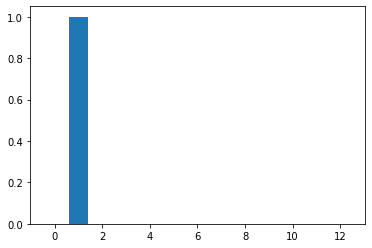

In [101]:
from matplotlib import pyplot
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_new, y_train)
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

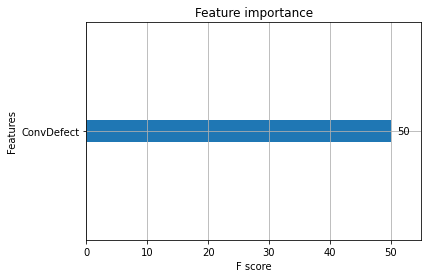

In [102]:
# plot feature importance
from xgboost import plot_importance
plot_importance(model)
pyplot.show()

In [103]:
ypred = model.predict(X_test_new)
cm = confusion_matrix(y_test, ypred)
print(cm)
print('Accuracy:- ' + str(accuracy_score(y_test, ypred)))

[[40  0]
 [ 0 35]]
Accuracy:- 1.0
